Student name: Diana Ngeta
Student pace: part time
Cohort: DS-PT-07
Phase: Three
Scheduled project review date: 1st Seotember 2024
Instructor name:samuel Karu / Sam G Mwangi / Winnie Anyoso


Business Understanding

Loading data


In [5]:
# Importinng libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [112]:
import sklearn
print(sklearn.__version__)

1.3.2


In [115]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\diana\anaconda3\envs\learn-env\lib\site-packages (1.3.2)Note: you may need to restart the kernel to use updated packages.



In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [7]:
import pandas as pd
df = pd.read_csv(r'C:\Users\DIANA\OneDrive\Desktop\Phase3_Project\Traffic_Crashes_-_Crashes_20240825.csv', dtype={'column_name': str}, low_memory=False)
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [8]:
column_names = df.columns.tolist()
print(column_names)

['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION']


In [9]:
#checking the shape of dataframe
df.shape

(866119, 48)

In [10]:
#printing the first five rows of dataframe
df.head()


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [11]:
#checking the datatype of columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866119 entries, 0 to 866118
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                866119 non-null  object 
 1   CRASH_DATE_EST_I               64340 non-null   object 
 2   CRASH_DATE                     866119 non-null  object 
 3   POSTED_SPEED_LIMIT             866119 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         866119 non-null  object 
 5   DEVICE_CONDITION               866119 non-null  object 
 6   WEATHER_CONDITION              866119 non-null  object 
 7   LIGHTING_CONDITION             866119 non-null  object 
 8   FIRST_CRASH_TYPE               866119 non-null  object 
 9   TRAFFICWAY_TYPE                866119 non-null  object 
 10  LANE_CNT                       199015 non-null  float64
 11  ALIGNMENT                      866119 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [12]:
#checking for the nullvalues 
df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 801779
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         667104
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       26393
CRASH_TYPE                            0
INTERSECTION_RELATED_I           667588
NOT_RIGHT_OF_WAY_I               826463
HIT_AND_RUN_I                    594636
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [13]:
import pandas as pd
df = pd.read_csv(r'C:\Users\DIANA\OneDrive\Desktop\Phase3_Project\Traffic_Crashes_-_People_20240825.csv', dtype={'column_name': str}, low_memory=False)
df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [14]:
column_names = df.columns.tolist()
print(column_names)

['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']


In [15]:
#checking the shape of dataframe
df.shape

(1902554, 29)

In [16]:
#printing the first five rows of dataframe
df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [17]:
#checking the datatype of columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902554 entries, 0 to 1902553
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [18]:
#checking for the nullvalues 
df.isna().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 38576
CRASH_DATE                     0
SEAT_NO                  1517585
CITY                      518272
STATE                     497346
ZIPCODE                   630327
SEX                        31952
AGE                       554890
DRIVERS_LICENSE_STATE     788736
DRIVERS_LICENSE_CLASS     974539
SAFETY_EQUIPMENT            5284
AIRBAG_DEPLOYED            37109
EJECTION                   23682
INJURY_CLASSIFICATION        740
HOSPITAL                 1591566
EMS_AGENCY               1710367
EMS_RUN_NO               1870518
DRIVER_ACTION             388371
DRIVER_VISION             388940
PHYSICAL_CONDITION        387340
PEDPEDAL_ACTION          1865759
PEDPEDAL_VISIBILITY      1865825
PEDPEDAL_LOCATION        1865759
BAC_RESULT                387423
BAC_RESULT VALUE         1900464
CELL_PHONE_USE           1901394
dtype: int64

In [19]:
df_crashes = pd.read_csv(r'C:\Users\DIANA\OneDrive\Desktop\Phase3_Project\Traffic_Crashes_-_Crashes_20240825.csv', low_memory=False)
df_people = pd.read_csv(r'C:\Users\DIANA\OneDrive\Desktop\Phase3_Project\Traffic_Crashes_-_People_20240825.csv', low_memory=False).drop('CRASH_DATE', axis=1)

In [20]:
# Merging the two data sets
df = pd.merge(df_crashes, df_people, on='CRASH_RECORD_ID').reset_index()

In [21]:
print('Total Number of Reported Crashes:', df['CRASH_RECORD_ID'].nunique())

Total Number of Reported Crashes: 864215


In [22]:
# Change the CRASH_DATE column to date data type.
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])

Display a plot showing the number of crashes that occur for each hour of the day.

In [23]:
# Add column containing hour of day that crash occured.
df['Hour'] = df['CRASH_DATE'].dt.hour

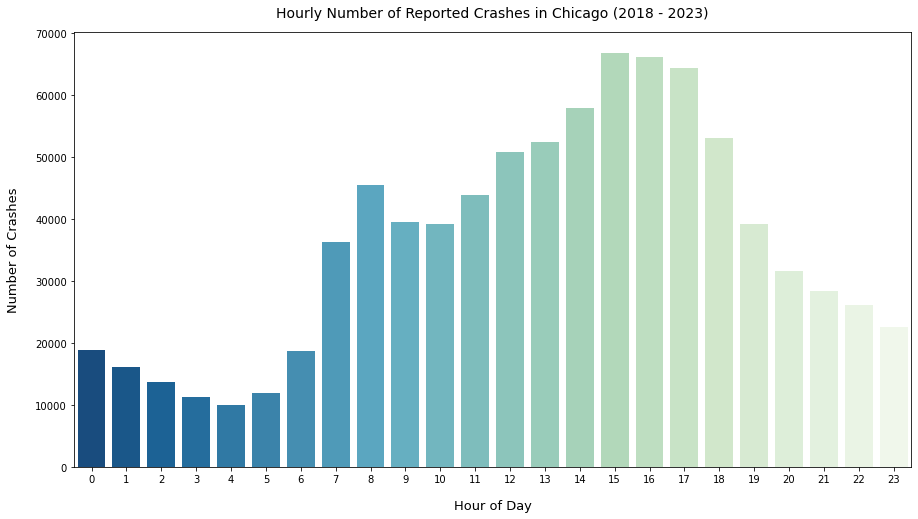

In [24]:
# Plot number of crashes by hour of day.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(), x='Hour', y='CRASH_RECORD_ID', palette='GnBu_r', linewidth=0)
s.set_title('Hourly Number of Reported Crashes in Chicago (2018 - 2023)', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

Most numbers occured between 3PM and 6PM

Basic Model- Logistic Regression

In [25]:
#importing skitlearn modulus
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [26]:
#checking the value counts
df['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              1324475
INJURY AND / OR TOW DUE TO CRASH     577362
Name: CRASH_TYPE, dtype: int64

In [27]:
df.rename(columns = {'CRASH_TYPE': 'SEVERE'}, inplace = True)
df['SEVERE'] = df['SEVERE'].map(lambda x:1 if x == 'INJURY AND / OR TOW DUE TO CRASH' else 0)

In [28]:
df['SEVERE'].value_counts()

0    1324475
1     577362
Name: SEVERE, dtype: int64

In [29]:
df.head(2)

,index,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,Hour
0,0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,FAILED TO YIELD,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,12
1,1,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,12


Checking the value counts of multiple columns using for loop

In [30]:
# finding value_counts of columns using for loop
columns=['INTERSECTION_RELATED_I','ALIGNMENT','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
         'WORK_ZONE_I','MOST_SEVERE_INJURY','FIRST_CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE']
for i in columns:
    print(df[i].value_counts())
    print('_________________________________________________________________')

Y    500262
N     23338
Name: INTERSECTION_RELATED_I, dtype: int64
_________________________________________________________________
STRAIGHT AND LEVEL       1856284
STRAIGHT ON GRADE          23794
CURVE, LEVEL               13135
STRAIGHT ON HILLCREST       5179
CURVE ON GRADE              2681
CURVE ON HILLCREST           764
Name: ALIGNMENT, dtype: int64
_________________________________________________________________
Y    60559
N     6649
Name: NOT_RIGHT_OF_WAY_I, dtype: int64
_________________________________________________________________
Y    495348
N     24911
Name: HIT_AND_RUN_I, dtype: int64
_________________________________________________________________
Y    8293
N    2376
Name: WORK_ZONE_I, dtype: int64
_________________________________________________________________
NO INDICATION OF INJURY     1563245
NONINCAPACITATING INJURY     187653
REPORTED, NOT EVIDENT        108110
INCAPACITATING INJURY         40169
FATAL                          2647
Name: MOST_SEVERE_INJURY

In [32]:
# calculating nulls
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Blues')

,% Null
CRASH_DATE_EST_I,0.944007
LANE_CNT,0.765250
REPORT_TYPE,0.036724
INTERSECTION_RELATED_I,0.724687
NOT_RIGHT_OF_WAY_I,0.964662
HIT_AND_RUN_I,0.726444
STREET_DIRECTION,0.000004
STREET_NAME,0.000001
BEAT_OF_OCCURRENCE,0.000006
PHOTOS_TAKEN_I,0.985981


In [33]:
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label

['CRASH_DATE_EST_I',
 'LANE_CNT',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'SEAT_NO',
 'HOSPITAL',
 'EMS_AGENCY',
 'EMS_RUN_NO',
 'PEDPEDAL_ACTION',
 'PEDPEDAL_VISIBILITY',
 'PEDPEDAL_LOCATION',
 'BAC_RESULT VALUE',
 'CELL_PHONE_USE']

Dropping Columns with Excessive Nulls

In [34]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
display(df.head())
df.info()

(1901837, 57)


,index,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,Hour
0,0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,D,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,TEST NOT OFFERED,12
1,1,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,DM,HELMET NOT USED,NOT APPLICABLE,PARTIALLY EJECTED,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,12
2,2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER TURN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,14
3,3,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,NaN,HELMET NOT USED,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED,17
4,4,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,TEST NOT OFFERED,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901837 entries, 0 to 1901836
Data columns (total 57 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   index                          int64         
 1   CRASH_RECORD_ID                object        
 2   CRASH_DATE                     datetime64[ns]
 3   POSTED_SPEED_LIMIT             int64         
 4   TRAFFIC_CONTROL_DEVICE         object        
 5   DEVICE_CONDITION               object        
 6   WEATHER_CONDITION              object        
 7   LIGHTING_CONDITION             object        
 8   FIRST_CRASH_TYPE               object        
 9   TRAFFICWAY_TYPE                object        
 10  ALIGNMENT                      object        
 11  ROADWAY_SURFACE_COND           object        
 12  ROAD_DEFECT                    object        
 13  REPORT_TYPE                    object        
 14  SEVERE                         int64         
 15  DAMAGE         

Dropping Irrelevant Columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901837 entries, 0 to 1901836
Data columns (total 57 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   index                          int64         
 1   CRASH_RECORD_ID                object        
 2   CRASH_DATE                     datetime64[ns]
 3   POSTED_SPEED_LIMIT             int64         
 4   TRAFFIC_CONTROL_DEVICE         object        
 5   DEVICE_CONDITION               object        
 6   WEATHER_CONDITION              object        
 7   LIGHTING_CONDITION             object        
 8   FIRST_CRASH_TYPE               object        
 9   TRAFFICWAY_TYPE                object        
 10  ALIGNMENT                      object        
 11  ROADWAY_SURFACE_COND           object        
 12  ROAD_DEFECT                    object        
 13  REPORT_TYPE                    object        
 14  SEVERE                         int64         
 15  DAMAGE         

Inspecting Values per Column

In [37]:
for col in df.columns:
    try:
        print(col, df[col].value_counts(dropna=False)[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

index 2047       1
1825233    1
1800645    1
1794502    1
1796551    1
1774024    1
1776073    1
1769930    1
1771979    1
1782220    1
Name: index, dtype: int64


CRASH_RECORD_ID 31ecf6862c691ff12d3856213b902c146b07337b42a5692e3a176a66d684d221028bb5118ef6d67a313bcaed9e97bee1855cb1f5e8650f49e8dc17663475a1ee    61
64d6480b38e77266a4d16717d0049f9df21075fa2dbf015cbbc83e59f019e6a69d3628ae1e4a9a70ec5dbf435fbdcd3b979cab5c991af14c08509f4c337f4a3d    54
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    50
3eda323ea45cd6e2b459bf5ba570dcf74e71f3fe1aa449231a47fd1dd20ce71de888840d420dc54b61ca643159b46494979dad05e407d8138438a675c615575d    48
1829f52c1281a0396ef94692331b3dc530bc4be5a54cd55e94c24a5e5e49b800fbcf9f24dabe4c8277c8964ad05aadc89e90fd94021959d6dff5fad55480d595    46
c727dc759107cf17b2e8141149347128bb4bc26b026c7805562206c7c5761c543dd7cc0e47fc11379455a2ecbb2847c3d1744d6feb78f276d9a457e9beeb6121    45
5fd56a31e9

In [45]:
print(df.columns)

Index(['index', 'CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'SEVERE', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'PERSON_ID', 'PERSON_TYPE', 'VEHICLE_ID', 'CITY', 'STATE', 'ZIPCODE',
       'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTIO

Creating time-bins for crash_hour

In [ ]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
df['time_bins'] = pd.cut(x=df['CRASH_HOUR'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df.head()

In [48]:
# observing values of crash_hour
df.CRASH_HOUR.value_counts()

15    155720
16    155582
17    150646
14    130702
18    123641
13    116564
12    110223
8      98610
11     93834
19     89469
10     81915
9      81596
7      79237
20     70433
21     63405
22     57714
23     48576
0      38109
6      36133
1      32379
2      26874
5      21522
3      20970
4      17983
Name: CRASH_HOUR, dtype: int64

In [50]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
df['time_bins'] = pd.cut(x=df['CRASH_HOUR'], bins = [0,6,12,18,23], 
                         labels = ['Late Night/Early Morning', 
                        'Morning', 'Afternoon/Rush Hour','Late Evening'])
df.head()

,index,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,Hour,time_bins
0,0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,SAFETY BELT USED,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,TEST NOT OFFERED,12,Morning
1,1,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,HELMET NOT USED,NOT APPLICABLE,PARTIALLY EJECTED,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,12,Morning
2,2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER TURN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,14,Afternoon/Rush Hour
3,3,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,HELMET NOT USED,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED,17,Afternoon/Rush Hour
4,4,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,TEST NOT OFFERED,17,Afternoon/Rush Hour


Creating age-bins for age

In [51]:
df.AGE.value_counts()

 25.0     37727
 26.0     37715
 27.0     37705
 28.0     37098
 24.0     36531
          ...  
-47.0         1
-177.0        1
-40.0         1
-59.0         1
-49.0         1
Name: AGE, Length: 117, dtype: int64

In [54]:
# creating bins and labels, preview data
df['AGE_bins'] = pd.cut(x=df['AGE'], bins = [0,15,24,35,55,100], 
                         labels = ['15 & Under', '16-24', 
                        '25-35', '36-55','56+'])
df.head()

,index,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,Hour,time_bins,AGE_bins
0,0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,TEST NOT OFFERED,12,Morning,36-55
1,1,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,NOT APPLICABLE,PARTIALLY EJECTED,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED,12,Morning,56+
2,2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER TURN,UNKNOWN,UNKNOWN,TEST NOT OFFERED,14,Afternoon/Rush Hour,NaN
3,3,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED,17,Afternoon/Rush Hour,15 & Under
4,4,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,NORMAL,TEST NOT OFFERED,17,Afternoon/Rush Hour,36-55


Creating posted_speed_limit bins 

In [55]:
df.POSTED_SPEED_LIMIT.value_counts()

30    1446436
35     134121
25     107554
20      64521
15      52975
10      33994
40      20816
0       14443
45      14304
5        8308
55       2090
50        656
3         496
9         199
39        189
99        140
60        122
1          64
24         62
65         48
2          45
32         39
34         33
33         31
36         23
11         20
26         16
6          13
7          12
14         10
70          8
31          7
22          6
29          5
12          4
8           4
18          4
23          4
38          4
4           3
44          3
63          2
62          1
46          1
49          1
Name: POSTED_SPEED_LIMIT, dtype: int64

CLEANING WEATHER CONDITIONS

In [47]:
df.WEATHER_CONDITION.value_counts()


CLEAR                       1509821
RAIN                         173936
UNKNOWN                       83803
SNOW                          59496
CLOUDY/OVERCAST               58643
OTHER                          5858
FREEZING RAIN/DRIZZLE          3792
FOG/SMOKE/HAZE                 3027
SLEET/HAIL                     2229
BLOWING SNOW                    961
SEVERE CROSS WIND GATE          257
BLOWING SAND, SOIL, DIRT         14
Name: WEATHER_CONDITION, dtype: int64

In [59]:
# defining dictionary map and remapping
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER'}

df.WEATHER_CONDITION = df.WEATHER_CONDITION.map(weather_map)
df.WEATHER_CONDITION.value_counts()

CLEAR                1509821
RAIN/CLOUDY/OTHER     316382
Name: WEATHER_CONDITION, dtype: int64

Cleaning DEVICE_CONDITION

In [56]:
df.DEVICE_CONDITION.value_counts()

NO CONTROLS                 982569
FUNCTIONING PROPERLY        759323
UNKNOWN                     128365
OTHER                        14927
FUNCTIONING IMPROPERLY       10007
NOT FUNCTIONING               5782
WORN REFLECTIVE MATERIAL       625
MISSING                        239
Name: DEVICE_CONDITION, dtype: int64

In [58]:
# defining dictionary map and remapping
device_map = {'NO CONTROLS': 'NO CONTROLS',
                      'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
                      'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
                      'OTHER': 'NOT FUNCTIONING/UNKNOWN',
                      'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
                      'NOT FUNCTIONING ': 'NOT FUNCTIONING/UNKNOWN'}

df.DEVICE_CONDITION = df.DEVICE_CONDITION.map(device_map)
df.DEVICE_CONDITION.value_counts()

NO CONTROLS                982569
FUNCTIONING PROPERLY       759323
NOT FUNCTIONING/UNKNOWN    153299
Name: DEVICE_CONDITION, dtype: int64

Cleaning FIRST_CRASH_TYPE

In [64]:
df.FIRST_CRASH_TYPE.value_counts()

REAR END                        506556
SIDESWIPE SAME DIRECTION        332680
TURNING                         327087
ANGLE                           252597
PARKED MOTOR VEHICLE            248552
FIXED OBJECT                     53235
PEDESTRIAN                       45323
SIDESWIPE OPPOSITE DIRECTION     31248
PEDALCYCLIST                     29371
REAR TO FRONT                    21329
HEAD ON                          20587
REAR TO SIDE                     12680
OTHER OBJECT                     11273
REAR TO REAR                      4269
OTHER NONCOLLISION                3395
ANIMAL                             805
OVERTURNED                         753
TRAIN                               97
Name: FIRST_CRASH_TYPE, dtype: int64

In [65]:
# defining dictionary map and remapping
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER'}

df.FIRST_CRASH_TYPE = df.FIRST_CRASH_TYPE.map(crash_map)
df.FIRST_CRASH_TYPE.value_counts()

TURNING/ANGLE    579684
REAR END         506556
SIDESWIPE        332680
PARKED/FIXED     301787
PED/CYCLIST       74694
OTHER             52204
Name: FIRST_CRASH_TYPE, dtype: int64

In [66]:
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        834763
DIVIDED - W/MEDIAN (NOT RAISED)    326314
ONE-WAY                            197885
FOUR WAY                           154738
DIVIDED - W/MEDIAN BARRIER         118922
PARKING LOT                         99758
OTHER                               48999
T-INTERSECTION                      29455
ALLEY                               24688
UNKNOWN                             20207
CENTER TURN LANE                    16196
UNKNOWN INTERSECTION TYPE            6740
RAMP                                 6027
DRIVEWAY                             5038
FIVE POINT, OR MORE                  3479
Y-INTERSECTION                       3178
TRAFFIC ROUTE                        2711
NOT REPORTED                         1747
ROUNDABOUT                            569
L-INTERSECTION                        423
Name: TRAFFICWAY_TYPE, dtype: int64

In [67]:
# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN'}

df.TRAFFICWAY_TYPE = df.TRAFFICWAY_TYPE.map(traffic_map)
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED    834763
DIVIDED        445236
ONE-WAY        197885
FOUR WAY       154738
ALLEY/OTHER    122516
PARKING LOT     99758
UNKNOWN         28694
Name: TRAFFICWAY_TYPE, dtype: int64

Cleaning Road_defects

In [68]:
df.ROAD_DEFECT.value_counts()

NO DEFECTS           1534804
UNKNOWN               335018
RUT, HOLES              9808
OTHER                   9694
WORN SURFACE            7976
SHOULDER DEFECT         3260
DEBRIS ON ROADWAY       1277
Name: ROAD_DEFECT, dtype: int64

In [71]:
# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
                'UNKNOWN': 'UNKNOWN/OTHER',
                'OTHER': 'UNKNOWN/OTHER',
                'SHOULDER DEFECT': 'UNKNOWN/OTHER'}

df.ROAD_DEFECT = df.ROAD_DEFECT.map(defect_map)
df.ROAD_DEFECT.value_counts()

NO DEFECTS       1534804
UNKNOWN/OTHER     347972
Name: ROAD_DEFECT, dtype: int64

Cleaning Safety_Equipment


In [72]:
df.SAFETY_EQUIPMENT.value_counts()

USAGE UNKNOWN                                 898049
SAFETY BELT USED                              887861
NONE PRESENT                                   64024
SAFETY BELT NOT USED                           10346
HELMET NOT USED                                 9366
CHILD RESTRAINT USED                            7822
CHILD RESTRAINT - FORWARD FACING                4816
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      3666
CHILD RESTRAINT - TYPE UNKNOWN                  2533
CHILD RESTRAINT - REAR FACING                   2197
DOT COMPLIANT MOTORCYCLE HELMET                 1458
HELMET USED                                     1358
BOOSTER SEAT                                    1249
CHILD RESTRAINT NOT USED                         846
NOT DOT COMPLIANT MOTORCYCLE HELMET              272
SHOULD/LAP BELT USED IMPROPERLY                  256
WHEELCHAIR                                       233
CHILD RESTRAINT USED IMPROPERLY                  156
STRETCHER                                     

In [73]:
# defining dictionary map and remapping
safety_map = {'USAGE UNKNOWN': 'USAGE UNKNOWN',
                'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                'NONE PRESENT': 'NONE PRESENT/USED',
                'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                'HELMET NOT USED': 'NONE PRESENT/USED',
                'SAFETY BELT NOT USED': 'NONE PRESENT/USED',
                'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/USED'}

df.SAFETY_EQUIPMENT = df.SAFETY_EQUIPMENT.map(safety_map)
df.SAFETY_EQUIPMENT.value_counts()

SAFETY EQUIPMENT USED    901073
USAGE UNKNOWN            898049
NONE PRESENT/USED         83992
Name: SAFETY_EQUIPMENT, dtype: int64

Cleaning airbag_deployed

In [74]:
df.AIRBAG_DEPLOYED.value_counts()


DID NOT DEPLOY                            959291
NOT APPLICABLE                            398571
DEPLOYMENT UNKNOWN                        381031
DEPLOYED, FRONT                            59476
DEPLOYED, COMBINATION                      48228
DEPLOYED, SIDE                             17222
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       926
Name: AIRBAG_DEPLOYED, dtype: int64

In [75]:
# defining dictionary map and remapping
airbag_map = {'DID NOT DEPLOY': 'DID NOT DEPLOY',
                'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                'DEPLOYMENT UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                'DEPLOYED, FRONT': 'DEPLOYED',
                'DEPLOYED, COMBINATION': 'DEPLOYED',
                'DEPLOYED, SIDE': 'DEPLOYED',
                'DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)': 'DEPLOYED'}

df.AIRBAG_DEPLOYED = df.AIRBAG_DEPLOYED.map(airbag_map)
df.AIRBAG_DEPLOYED.value_counts()

DID NOT DEPLOY            959291
NOT APPLICABLE/UNKNOWN    779602
DEPLOYED                  125852
Name: AIRBAG_DEPLOYED, dtype: int64

Cleaning driving_vision

In [76]:
df.DRIVER_VISION.value_counts()

NOT OBSCURED              758962
UNKNOWN                   718028
OTHER                      14913
MOVING VEHICLES             8501
PARKED VEHICLES             5220
WINDSHIELD (WATER/ICE)      4063
BLINDED - SUNLIGHT          1775
TREES, PLANTS                601
BUILDINGS                    535
BLINDED - HEADLIGHTS         161
BLOWING MATERIALS            105
HILLCREST                     97
EMBANKMENT                    83
SIGNBOARD                     36
Name: DRIVER_VISION, dtype: int64

In [77]:
# defining dictionary map and remapping
driver_map = {'NOT OBSCURED': 'NOT OBSCURED',
                'UNKNOWN': 'UNKNOWN',
                'OTHER': 'OBSCURED',
                'PARKED VEHICLES': 'OBSCURED',
                'MOVING VEHICLES': 'OBSCURED',
                'BLINDED - SUNLIGHT': 'OBSCURED'}

df.DRIVER_VISION = df.DRIVER_VISION.map(driver_map)
df.DRIVER_VISION.value_counts()

NOT OBSCURED    758962
UNKNOWN         718028
OBSCURED         30409
Name: DRIVER_VISION, dtype: int64

Identifying and cleaning target

In [79]:
# creating classes: 0 = not injured, 1 = injured
df['INJURIES_TOTAL'] = df['INJURIES_TOTAL'].map(lambda x: 1 if x > 0 else 0)

In [82]:
# renaming column 
df.rename(columns = {'INJURIES_TOTAL':'Injured'}, inplace = True) 

In [83]:
# reviewing classification 
df.Injured.value_counts()

0    1563258
1     338579
Name: Injured, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901837 entries, 0 to 1901836
Data columns (total 56 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   index                          int64         
 1   CRASH_RECORD_ID                object        
 2   CRASH_DATE                     datetime64[ns]
 3   TRAFFIC_CONTROL_DEVICE         object        
 4   DEVICE_CONDITION               object        
 5   WEATHER_CONDITION              object        
 6   LIGHTING_CONDITION             object        
 7   FIRST_CRASH_TYPE               object        
 8   TRAFFICWAY_TYPE                object        
 9   ALIGNMENT                      object        
 10  ROADWAY_SURFACE_COND           object        
 11  ROAD_DEFECT                    object        
 12  REPORT_TYPE                    object        
 13  SEVERE                         int64         
 14  DAMAGE                         object        
 15  DATE_POLICE_NOT

In [88]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

index 2047       1
1825233    1
1800645    1
1794502    1
1796551    1
1774024    1
1776073    1
1769930    1
1771979    1
1782220    1
Name: index, dtype: int64


CRASH_RECORD_ID 31ecf6862c691ff12d3856213b902c146b07337b42a5692e3a176a66d684d221028bb5118ef6d67a313bcaed9e97bee1855cb1f5e8650f49e8dc17663475a1ee    61
64d6480b38e77266a4d16717d0049f9df21075fa2dbf015cbbc83e59f019e6a69d3628ae1e4a9a70ec5dbf435fbdcd3b979cab5c991af14c08509f4c337f4a3d    54
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    50
3eda323ea45cd6e2b459bf5ba570dcf74e71f3fe1aa449231a47fd1dd20ce71de888840d420dc54b61ca643159b46494979dad05e407d8138438a675c615575d    48
1829f52c1281a0396ef94692331b3dc530bc4be5a54cd55e94c24a5e5e49b800fbcf9f24dabe4c8277c8964ad05aadc89e90fd94021959d6dff5fad55480d595    46
c727dc759107cf17b2e8141149347128bb4bc26b026c7805562206c7c5761c543dd7cc0e47fc11379455a2ecbb2847c3d1744d6feb78f276d9a457e9beeb6121    45
5fd56a31e9

Explore

<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK', ylabel='count'>

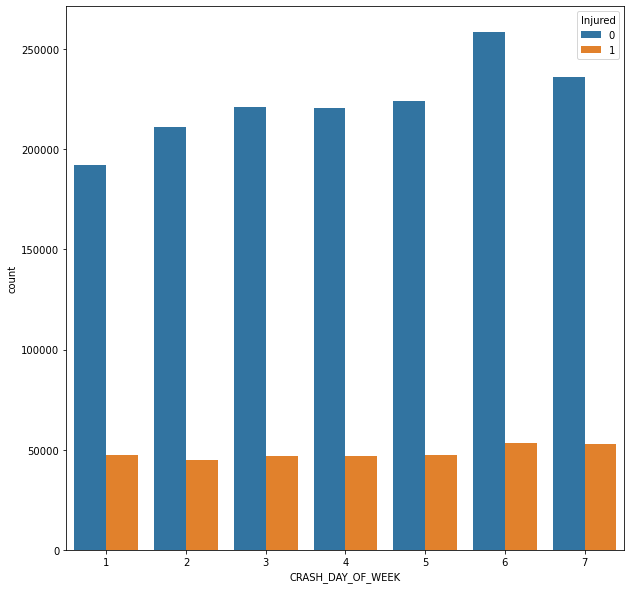

In [90]:
plt.figure(figsize=(10,10))
sns.countplot(x="CRASH_DAY_OF_WEEK", hue="Injured", data=df)

<AxesSubplot:xlabel='TRAFFIC_CONTROL_DEVICE', ylabel='count'>

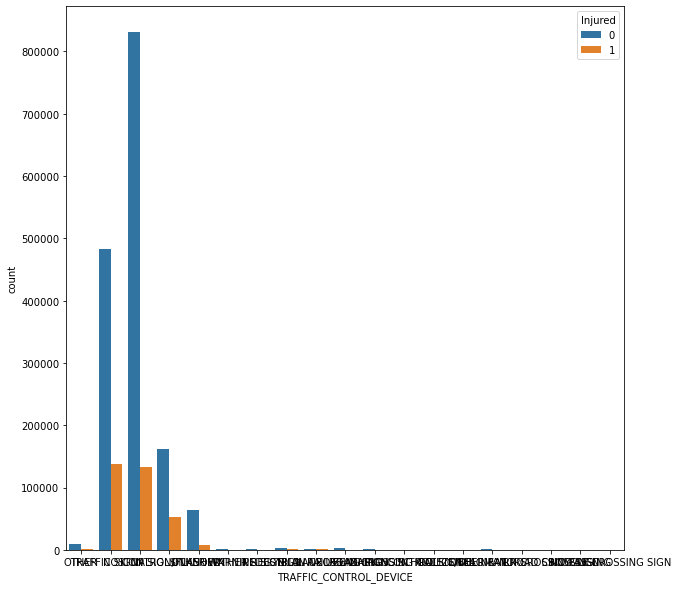

In [91]:
plt.figure(figsize=(10,10))
sns.countplot(x="TRAFFIC_CONTROL_DEVICE", hue="Injured", data=df)

<AxesSubplot:xlabel='FIRST_CRASH_TYPE', ylabel='count'>

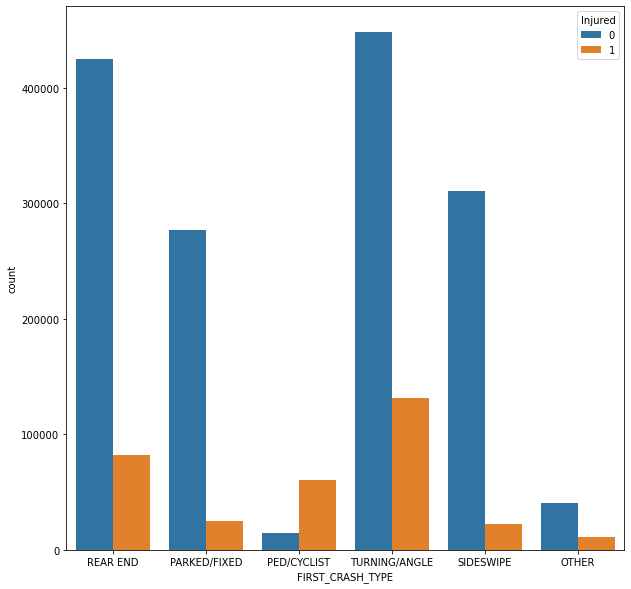

In [92]:
plt.figure(figsize=(10,10))
sns.countplot(x="FIRST_CRASH_TYPE", hue="Injured", data=df)

<AxesSubplot:xlabel='time_bins', ylabel='count'>

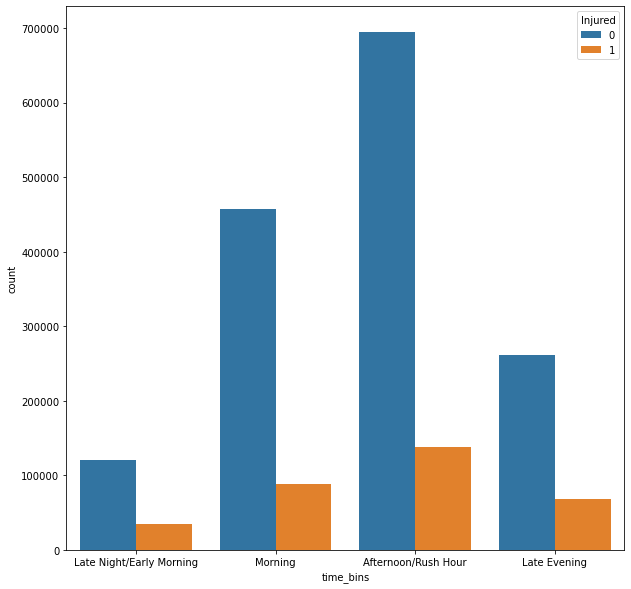

In [93]:
plt.figure(figsize=(10,10))
sns.countplot(x="time_bins", hue="Injured", data=df)

<AxesSubplot:xlabel='AGE_bins', ylabel='count'>

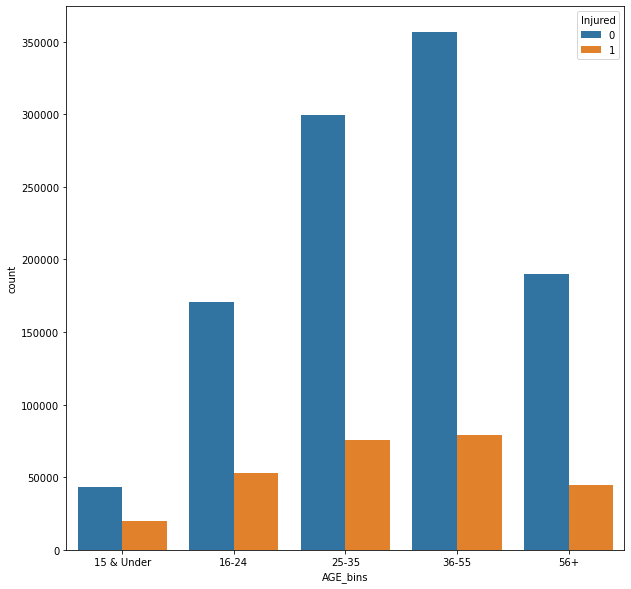

In [95]:
plt.figure(figsize=(10,10))
sns.countplot(x="AGE_bins", hue="Injured", data=df)

<AxesSubplot:xlabel='SEX', ylabel='count'>

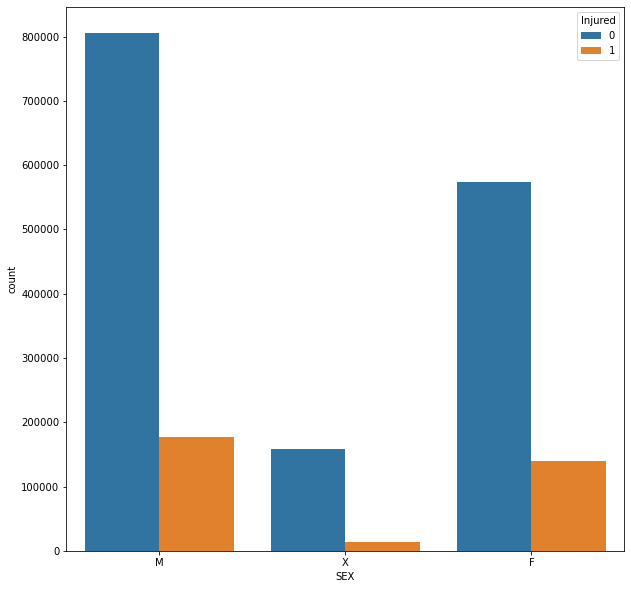

In [96]:
plt.figure(figsize=(10,10))
sns.countplot(x="SEX", hue="Injured", data=df)

In [99]:
# reviewing data 
df.describe()

,index,SEVERE,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,Injured,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_ID,Hour
count,1.901837e+06,1.901837e+06,1.901837e+06,1.901825e+06,1.901837e+06,1.901837e+06,1.901837e+06,1.901837e+06,1.901837e+06,1.901837e+06,1.901837e+06,1901837.0,1.901837e+06,1.901837e+06,1.888333e+06,1.888333e+06,1.863278e+06,1.901837e+06
mean,9.509180e+05,3.035812e-01,3.637741e+03,1.233559e+03,2.089309e+00,1.780273e-01,1.585835e-03,2.721421e-02,1.593654e-01,9.769397e-02,2.555635e+00,0.0,4.138774e+00,6.617861e+00,4.185345e+01,-8.767132e+01,8.948100e+05,1.345073e+01
std,5.490132e+05,4.598041e-01,2.867579e+03,7.019380e+02,4.759990e-01,3.825359e-01,4.526794e-02,2.101996e-01,5.913159e-01,4.460878e-01,1.945694e+00,0.0,1.988848e+00,3.365767e+00,3.922203e-01,8.041256e-01,5.202794e+05,5.447316e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,-8.793619e+01,2.000000e+00,0.000000e+00
25%,4.754590e+05,0.000000e+00,1.201000e+03,7.130000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,2.000000e+00,4.000000e+00,4.178340e+01,-8.772185e+01,4.441672e+05,1.000000e+01
50%,9.509180e+05,0.000000e+00,3.159000e+03,1.134000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0,4.000000e+00,7.000000e+00,4.187447e+01,-8.767404e+01,8.855675e+05,1.400000e+01
75%,1.426377e+06,1.000000e+00,5.520000e+03,1.814000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.0,6.000000e+00,1.000000e+01,4.192351e+01,-8.763292e+01,1.347128e+06,1.700000e+01
max,1.901836e+06,1.000000e+00,4.511000e+05,6.100000e+03,1.800000e+01,1.000000e+00,4.000000e+00,1.000000e+01,2.100000e+01,1.500000e+01,6.100000e+01,0.0,7.000000e+00,1.200000e+01,4.202278e+01,0.000000e+00,1.801606e+06,2.300000e+01


In [145]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

#!pip install shap
import shap 
shap.initjs()

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

import folium 

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\DIANA\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\__init__.py)

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Train-Test-Split

In [148]:
# setting X, y for train-test-split
target = 'Injured'
X = df.drop(columns= target)
y = df[target]

# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [149]:
# retrieving list of numeric columns 
num_cols = df.drop(columns=target).select_dtypes('number').columns.tolist()
num_cols

['index',
 'SEVERE',
 'STREET_NO',
 'BEAT_OF_OCCURRENCE',
 'NUM_UNITS',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'VEHICLE_ID',
 'Hour']

In [132]:
# retrieving list of categorical columns 
cat_cols = df.drop(columns=target).select_dtypes('object').columns.tolist()
cat_cols

['CRASH_RECORD_ID',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'MOST_SEVERE_INJURY',
 'LOCATION',
 'PERSON_ID',
 'PERSON_TYPE',
 'CITY',
 'STATE',
 'ZIPCODE',
 'SEX',
 'DRIVERS_LICENSE_STATE',
 'DRIVERS_LICENSE_CLASS',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'INJURY_CLASSIFICATION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'BAC_RESULT']

In [150]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

In [153]:
# creating a pipeline
# SimpleImputer will use strategy 'constant' == 'missing value' input for objects
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value="MISSING")),
                         ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [155]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [159]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

NameError: name 'num_transform' is not defined

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

#!pip install shap
import shap 
shap.initjs()

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

import folium 

import warnings
warnings.filterwarnings('ignore')

In [124]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

Class Imbalance SMOTE

In [127]:
# observing y_train(classes) count 
y_train.value_counts(normalize=True)

0    0.822119
1    0.177881
Name: Injured, dtype: float64

# # Using the SMOTE procedure to solve class imbalance problems 
# X_train_tf, y_train = SMOTE().fit_resample(X_train_tf, y_train)

# # reviewing SMOTE has been implemented 
# pd.Series(y_train).value_counts()

Logistic regression

In [128]:
# instantiate LogisticRegression 
log_reg = LogisticRegression()

In [141]:
# fit the model 
log_reg.fit(X_train_tf, y_train)

# predict
y_pred = log_reg.predict(X_test_tf)

NameError: name 'X_train_tf' is not defined

In [143]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf

NameError: name 'preprocessing' is not defined